# Métodos Probabilisticos

Autor: Adson Nogueira Alves

E-mail: adson.alves@facens.br

Linkedin: www.linkedin.com/in/adson-alves

## Estatística

Entre os objetivos de Inteligência Artificial está o de fazer previsões baseadas em padrões encontrados na estrutura de dados. Isso possibilita a realização de tarefas analíticas sem intervenção humana. Nesse contexto podemos definir estatistica como:

**Definição:** Conjunto de estratégias usadas ​​para obter informações sobre os dados com o objetivo na tomada de decisão. Trabalhando questões como distribuição, ​​dependência e independentes dos dados.

Serve como base na análise e tratamento dos dados, auxiliando na representação visual, análise de desempenho, identificação de padrões específicos, valores discrepantes e resumos de métricas como mediana, média, desvio padrão e assim por diante.

### Aplicando pensamento estatístico em IA

* Ter claro e bem definido o escopo do problema
* Entender a metodologia de ciência de dados que o melhor represente.
* Qualidade dos dados utilizados (Entendimento, limpeza, transformação, etc.)
* Analisar tendências que podem levar a uma aprendizagem tendenciosa. Para isso utilizar uma estatistica descritiva e gráficos podem ser interessantes.
* Testes de hipóteses incluindo grupos de controle.
* Validar o modelo.
* Monitoramento e atualização dos modelos.
* Implementação de procedimentos de monitoramento do modelo.

### Classificação Naive Bayes

Naive Bayes é um classificador probabilístico simples e bastante robusto, baseado no teorema de Bayes e independência das features.

O Teorema de Bayes, descreve a relação de probabilidades condicionais de quantidades estatísticas. Assim, temos:


P (A |B) = P (B | A) x P (A) / P (B)

Onde:

* P (B | A) significa a probabilidade de B acontecer já que o evento A se confirmou
* P (A) é a probabilidade de A acontecer
* P (B) é a probabilidade de B acontecer


In [ ]:
! pip install -U kaggle pandas numpy matplotlib seaborn scikit-learn openpyxl

In [6]:
# https://www.kaggle.com/datasets/yaminh/crop-yield-prediction

#!/bin/bash
! kaggle datasets download yaminh/crop-yield-prediction

Dataset URL: https://www.kaggle.com/datasets/yaminh/crop-yield-prediction
License(s): apache-2.0


In [11]:
import pandas as pd
! unzip crop-yield-prediction.zip -y
! rm -rf crop-yield-prediction.zip


Archive:  crop-yield-prediction.zip
caution: filename not matched:  -y


In [16]:
df = pd.read_excel("crop yield data sheet.xlsx")

In [17]:
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Fertilizante: Representando a quantidade ou concentração de fertilizante aplicado em algumas unidades

Temperatura: Condições de temperatura durante o período de cultivo.

Nitrogênio (N): Quantidade de nitrogênio presente no fertilizante ou solo,
normalmente medida em libras por acre.

Fósforo (P): Quantidade de fósforo presente no fertilizante ou solo, normalmente medida em libras por acre.

Potássio (K): Quantidade de potássio presente no fertilizante ou solo, normalmente medida em libras por acre.

Rendimento (Q/acre): A quantidade de colheita colhida por acre, normalmente medida em alqueires, toneladas ou outras unidades apropriadas.

In [18]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rain Fall (mm),99.0,849.797980,400.042676,400.0,450.0,1150.0,1237.5,1300.0
Fertilizer,99.0,67.808081,10.028202,50.0,60.0,70.0,77.0,80.0
Nitrogen (N),99.0,70.737374,6.677079,59.0,65.0,71.0,77.0,80.0
Phosphorus (P),99.0,21.131313,1.951695,18.0,19.5,21.0,23.0,25.0
Potassium (K),99.0,18.060606,1.817254,15.0,16.0,19.0,19.0,22.0
Yeild (Q/acre),99.0,9.050505,1.965902,5.5,7.0,9.0,11.0,12.0


In [20]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [21]:
df.loc[(df['Yeild (Q/acre)'] >= 5) & (df['Yeild (Q/acre)'] <= 8), 'Quantidade'] = 'RUIM'
df.loc[(df['Yeild (Q/acre)'] > 8) & (df['Yeild (Q/acre)'] <= 10), 'Quantidade'] = 'NORMAL'
df.loc[df['Yeild (Q/acre)'] > 10, 'Quantidade'] = 'EXCELENTE'


In [25]:
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre),Quantidade
0,1230.0,80.0,28,80.0,24.0,20.0,12.0,EXCELENTE
1,480.0,60.0,36,70.0,20.0,18.0,8.0,RUIM
2,1250.0,75.0,29,78.0,22.0,19.0,11.0,EXCELENTE
3,450.0,65.0,35,70.0,19.0,18.0,9.0,NORMAL
4,1200.0,80.0,27,79.0,22.0,19.0,11.0,EXCELENTE
...,...,...,...,...,...,...,...,...
94,1250.0,77.0,28,78.0,23.0,20.0,9.0,NORMAL
95,425.0,60.0,39,65.0,19.0,17.0,6.5,RUIM
96,1220.0,79.0,28,77.0,23.0,21.0,10.5,EXCELENTE
97,480.0,65.0,36,68.0,21.0,16.0,7.0,RUIM


In [23]:
df["Quantidade"].unique()
df["Quantidade"].value_counts()


Quantidade
RUIM         40
EXCELENTE    33
NORMAL       26
Name: count, dtype: int64

In [24]:
print(df["Quantidade"].value_counts() / len(df) )

Quantidade
RUIM         0.404040
EXCELENTE    0.333333
NORMAL       0.262626
Name: count, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split

label = df["Quantidade"]
features = df.drop(["Quantidade","Yeild (Q/acre)"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, stratify=label)

In [28]:
X_test.shape, y_test.shape

((20, 6), (20,))

In [30]:
y_test.value_counts() / len(y_test)

Quantidade
RUIM         0.40
EXCELENTE    0.35
NORMAL       0.25
Name: count, dtype: float64

In [31]:
## Treinamento
from sklearn.naive_bayes import GaussianNB

modelo =GaussianNB()
modelo.fit(X_train, y_train,)

GaussianNB()

In [32]:
previsao = modelo.predict(X_test)
previsao

array(['RUIM', 'EXCELENTE', 'RUIM', 'NORMAL', 'RUIM', 'RUIM', 'RUIM',
       'NORMAL', 'EXCELENTE', 'EXCELENTE', 'EXCELENTE', 'EXCELENTE',
       'RUIM', 'RUIM', 'EXCELENTE', 'RUIM', 'EXCELENTE', 'EXCELENTE',
       'EXCELENTE', 'EXCELENTE'], dtype='<U9')

In [33]:
modelo.score(X_test,y_test) # primeira forma

0.75

In [34]:
from sklearn.metrics import accuracy_score # segunda forma

accuracy_score(previsao,y_test)

0.75

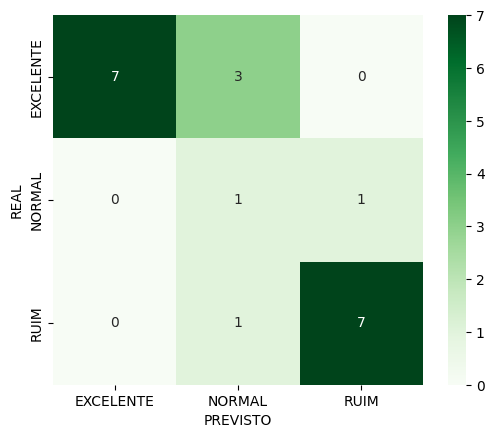

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(previsao, y_test)
# Create the heatmap
sns.heatmap(cm, annot=True, square=True, cmap='Greens', xticklabels=modelo.classes_, yticklabels=modelo.classes_)

# Add labels
plt.xlabel('PREVISTO')
plt.ylabel('REAL')

# Show the plot
plt.show()


Possiveis razões de baixo percentual de acerto, são:
* Baixa representatividade dos dados
* Desbalanciamento de classes.

Técnicas de Subamostragem ou Sobreamostragem podem ser úteis para minimizar esse impacto.

Para saber mais leia:

https://imbalanced-learn.org/stable/user_guide.html

### Regras de Associação - Apriori

Encontrar relacionamentos ou padrões frequentes entre conjuntos de dados, sendo uma técnica baseada em regras, podendo ser aplicada em diversos cenarios como mineração de dados, produção contínua etc.

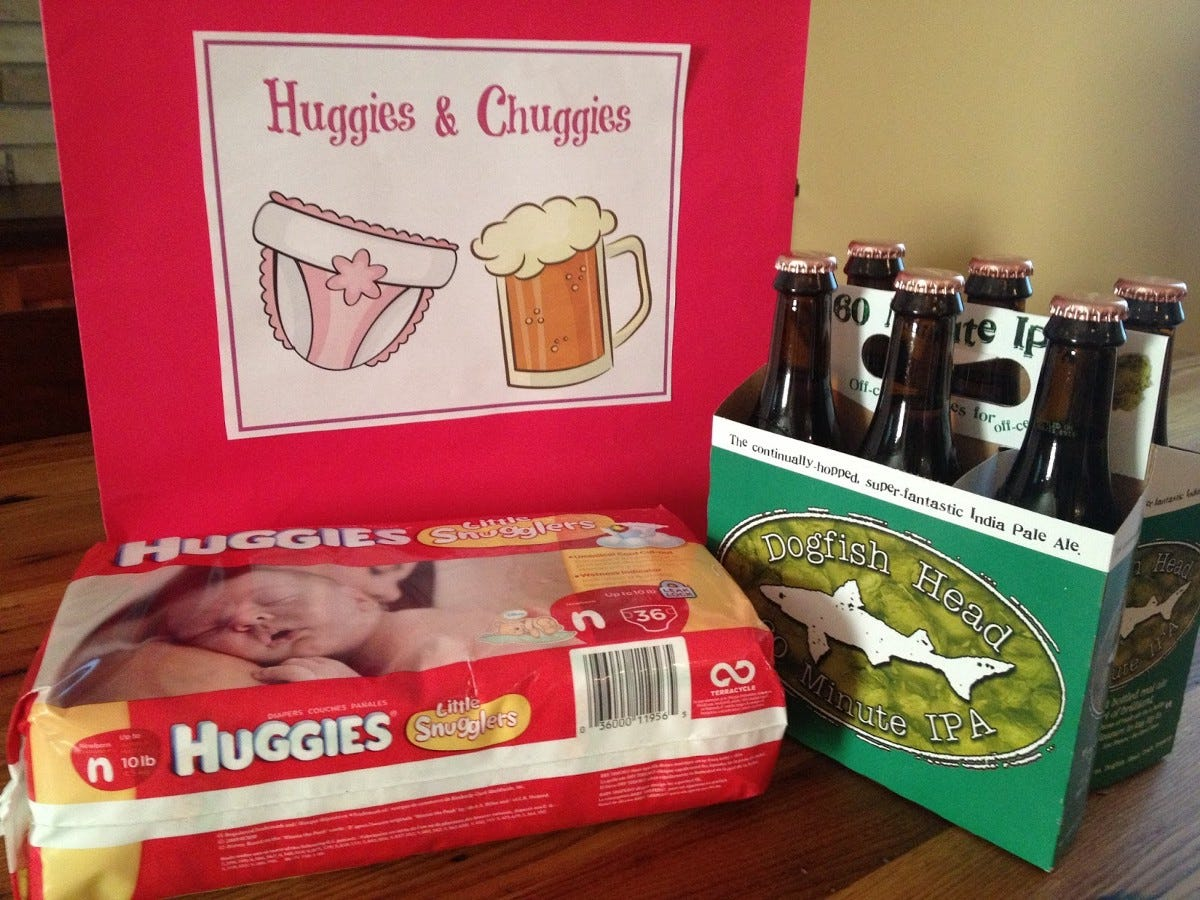

**Fonte: https://medium.com/murilo-cremon/regras-de-associa%C3%A7%C3%A3o-no-alteryx-df74716c1e75**

O objetivo do Apriori é identificar itens frequentes em um conjunto de dados e gerar regras de associação que relacionem esses itens entre si. Por exemplo, em um supermercado, pode-se descobrir que "se o cliente compra pão, ele tem uma maior probabilidade de comprar manteiga.

Onde:

A e B são conjuntos de itens.

A regra indica que, se o item A for comprado, há uma alta probabilidade de o item B também ser comprado.

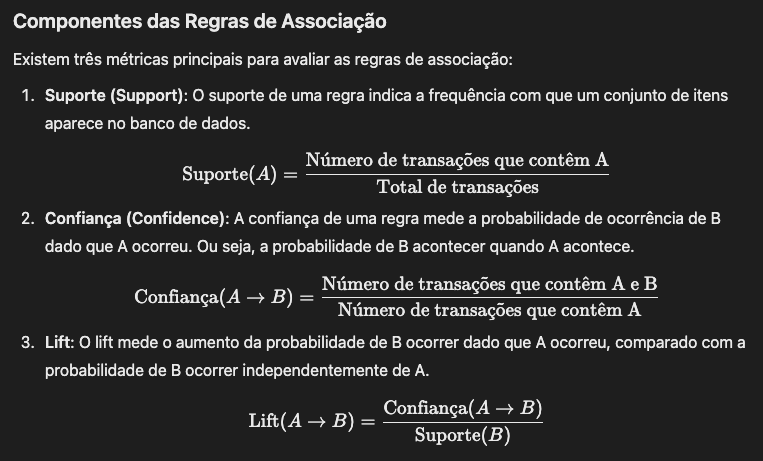

In [ ]:
# ##www.kaggle.com/code/ekrembayar/apriori-association-rules-grocery-store/input?select=GroceryStoreDataSet.csv

# ! kaggle datasets download -d alexmiles/grocery-products-purchase-data
# import pandas as pd
#! unzip grocery-products-purchase-data.zip
#! rm -rf grocery-products-purchase-data.zip

In [100]:
#!/bin/bash
import pandas as pd
! kaggle datasets download irfanasrullah/groceries
! unzip groceries.zip
! rm -rf groceries.zip

Dataset URL: https://www.kaggle.com/datasets/irfanasrullah/groceries
License(s): copyright-authors
Archive:  groceries.zip
  inflating: groceries - groceries.csv  
  inflating: groceries.csv           


In [101]:
df = pd.read_csv("groceries - groceries.csv")
df.head(10)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [103]:
df.drop("Item(s)", inplace=True, axis=1)
df

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
! pip install apyori
from apyori import apriori

In [106]:
import numpy as np

ocorrencias = np.array(df[:4],dtype=np.str_).tolist()
ocorrencias

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan'

In [219]:
regras = list(apriori(ocorrencias, min_support=0.25, min_confidence=0.95))

In [220]:
resultado = list(regras)
resultado

[RelationRecord(items=frozenset({'nan'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'margarine', 'citrus fruit'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'margarine'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'margarine'}), items_add=frozenset({'citrus fruit'}), confidence=1.0, lift=4.0)]),
 RelationRecord(items=frozenset({'nan', 'citrus fruit'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'nan'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'ready soups', 'citrus fruit'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'ready soups'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'ready soups'}),

In [221]:
len(resultado)

64

In [222]:
resultado[1]

RelationRecord(items=frozenset({'margarine', 'citrus fruit'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset({'citrus fruit'}), items_add=frozenset({'margarine'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'margarine'}), items_add=frozenset({'citrus fruit'}), confidence=1.0, lift=4.0)])

### Seleção de atributos com Teste de Hipóteses - univariate SelectFdr

[Seleção de Features](https://scikit-learn.org/stable/modules/feature_selection.html#)

[SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#selectfdr)

In [ ]:
#!/bin/bash
! kaggle datasets download rodolfomendes/abalone-dataset

Dataset URL: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset
License(s): other


In [123]:
! unzip abalone-dataset.zip
! rm -rf abalone-dataset.zip

Archive:  abalone-dataset.zip
  inflating: abalone.csv             


In [134]:
df = pd.read_csv("abalone.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [127]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [136]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex']= encoder.fit_transform(df['Sex']) 

In [137]:
df['Sex'].value_counts()

Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.052909,0.822240,0.0000,0.0000,1.0000,2.000,2.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [140]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [152]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Sex", axis=1)
y = df["Sex"] 

test_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=12, shuffle=True) 

model = RandomForestClassifier(random_state=1, verbose=0, n_estimators=100)

model.fit(X_train, y_train)

# Accuracy
print("Random Forest Accuracy (without feature selection): ", '{:.2%}'.format(model.score(X_val,y_val)))

Random Forest Accuracy (without feature selection):  55.86%


Accuracy: 0.5610047846889952


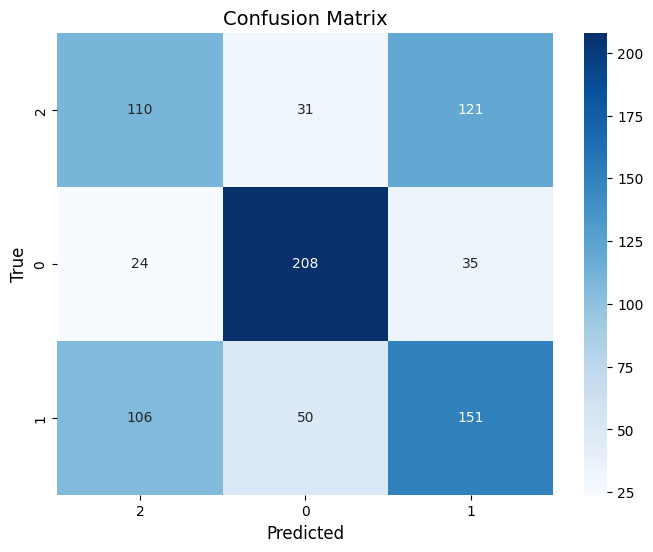

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:',accuracy)

cm = confusion_matrix(y_val, y_pred)

class_names = df['Sex'].unique()
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


**Univariate SelectFdr**

O **teste F** é uma técnica estatística que verifica se há uma relação significativa entre uma característica (feature) e a variável alvo (target). Ele calcula uma estatística de teste que nos diz se a diferença entre as médias de grupos (por exemplo, as classes da variável alvo) é grande o suficiente para ser considerada relevante.

O valor de **p (p-value)** é a probabilidade de que o resultado observado no teste tenha ocorrido por acaso. Ou seja, quanto menor o valor de p, mais forte é a evidência de que a característica tem uma relação significativa com a variável alvo.

In [223]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2

selecao = SelectFdr(chi2, alpha=0.0005) # alpha a probabilidade de rejeitar a hipotese nula (padrão)
X_novo = selecao.fit_transform(X, y)

In [224]:
X.shape, X_novo.shape

((4177, 8), (4177, 7))

In [225]:
colunas = selecao.get_support()
print(colunas)
print(X.columns)

[ True  True False  True  True  True  True  True]
Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


Random Forest Accuracy (without feature selection):  56.10%
Accuracy: 0.5610047846889952


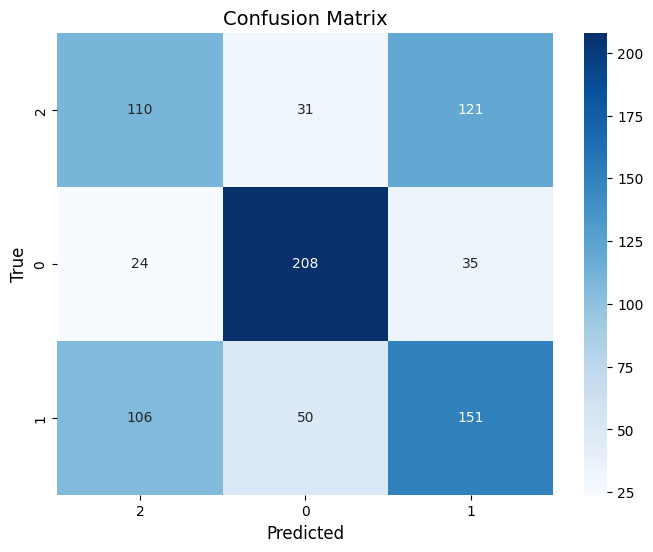

In [226]:
test_s = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_novo, y, test_size=test_s, random_state=42, shuffle=True) # recordar

model = RandomForestClassifier(random_state=1, verbose=0, n_estimators=100)

model.fit(X_train, y_train)

# Accuracy
print("Random Forest Accuracy (without feature selection): ", '{:.2%}'.format(model.score(X_val,y_val)))

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_val, y_pred)

class_names = df['Sex'].unique()
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


**`Para aprender mais sobre testes de hipóteses** https://heartbeat.comet.ml/understanding-hypothesis-testing-in-machine-learning-f971c8b1cd57